# Food Classification

## Keras Upgrade

In [ ]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.1.1 which is incompatible.


In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터셋 다운로드

In [ ]:
import gdown, zipfile # gdown: google drive download
import os, glob, shutil
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

* image 압축 파일과 csv 파일을 다운로드

In [ ]:
def download_file(file_id, save_path) :
    if os.path.exists(save_path) :
        print(f'{save_path} 파일이 이미 존재합니다.')
        return

    gdown.download(id=file_id, output=save_path, quiet=False)

In [ ]:
img_file_id = '1WfKsIe4ovPVtCgrh0HKNBw9uST8oC4vF'
#img_file_id = '17K9VxCkeTjMY_Iem8b9txEsMvZgsEqHs'
#img_file_id = '1c0aImdM8dSlLn0sLzgIx-x_gAuXqMaZg'

download_file(img_file_id, 'food_images.zip')

In [ ]:
# csv_file_id = '1jNRa-1lUhHFrNONURkj2tQD8spVIwlB_'
csv_file_id = '1BoD_yc6OJvFLWjciOL4DYGITyyinIdcw'
# csv_file_id = '1S4Bx_8iFcK3yUnMy4FeTVxxFi30PbbQN'

download_file(csv_file_id, 'food_labels.csv')

Downloading...
From: https://drive.google.com/uc?id=1BoD_yc6OJvFLWjciOL4DYGITyyinIdcw
To: /content/food_labels.csv
100%|██████████| 1.36M/1.36M [00:00<00:00, 46.4MB/s]


* 이미지 압축 파일 압축 해제

128x128 이미지 분류 문제

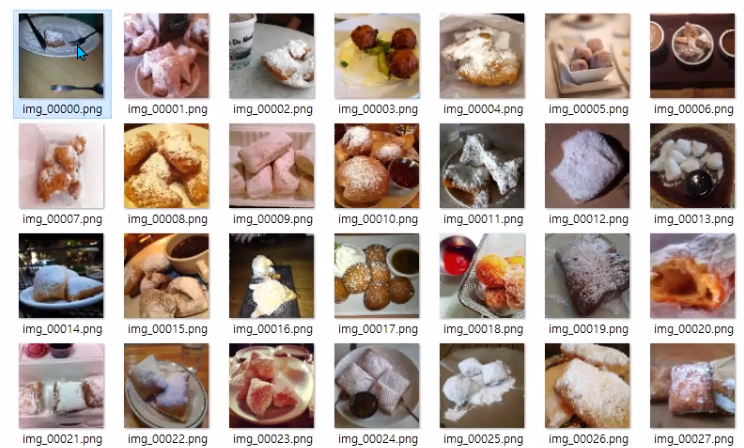

In [ ]:
def dataset_extract(file_name) :
    with zipfile.ZipFile(file_name, 'r') as zip_ref :
        file_list = zip_ref.namelist() # zip_ref에 포함된 모든 파일과 폴더의 이름 목록을 file_list에 저장

        if os.path.exists(f'{file_name[:-4]}/') :
            print(f'데이터셋 폴더가 이미 존재합니다.')
            return

        else :
            for f in tqdm(file_list, desc='Extracting', unit='files') : # 파일 목록 반복하면서 파일 추출. tqdm은 진행률 표시줄로, 각 파일이 추출될 때마다 Extracting과 함께 파일 수 표시
                zip_ref.extract(member=f, path=f'{file_name[:-4]}/')

In [ ]:
dataset_extract('/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images.zip')

## 데이터 컬럼 구성

In [ ]:
class_names = {"apple_pie": 0,
  "baby_back_ribs": 1,
  "baklava": 2,
  "beef_carpaccio": 3,
  "beef_tartare": 4,
  "beet_salad": 5,
  "beignets": 6,
  "bibimbap": 7,
  "bread_pudding": 8,
  "breakfast_burrito": 9,
  "bruschetta": 10,
  "caesar_salad": 11,
  "cannoli": 12,
  "caprese_salad": 13,
  "carrot_cake": 14,
  "ceviche": 15,
  "cheesecake": 16,
  "cheese_plate": 17,
  "chicken_curry": 18,
  "chicken_quesadilla": 19,
  "chicken_wings": 20,
  "chocolate_cake": 21,
  "chocolate_mousse": 22,
  "churros": 23,
  "clam_chowder": 24,
  "club_sandwich": 25,
  "crab_cakes": 26,
  "creme_brulee": 27,
  "croque_madame": 28,
  "cup_cakes": 29,
  "deviled_eggs": 30,
  "donuts": 31,
  "dumplings": 32,
  "edamame": 33,
  "eggs_benedict": 34,
  "escargots": 35,
  "falafel": 36,
  "filet_mignon": 37,
  "fish_and_chips": 38,
  "foie_gras": 39,
  "french_fries": 40,
  "french_onion_soup": 41,
  "french_toast": 42,
  "fried_calamari": 43,
  "fried_rice": 44,
  "frozen_yogurt": 45,
  "garlic_bread": 46,
  "gnocchi": 47,
  "greek_salad": 48,
  "grilled_cheese_sandwich": 49,
  "grilled_salmon": 50,
  "guacamole": 51,
  "gyoza": 52,
  "hamburger": 53,
  "hot_and_sour_soup": 54,
  "hot_dog": 55,
  "huevos_rancheros": 56,
  "hummus": 57,
  "ice_cream": 58,
  "lasagna": 59,
  "lobster_bisque": 60,
  "lobster_roll_sandwich": 61,
  "macaroni_and_cheese": 62,
  "macarons": 63,
  "miso_soup": 64,
  "mussels": 65,
  "nachos": 66,
  "omelette": 67,
  "onion_rings": 68,
  "oysters": 69,
  "pad_thai": 70,
  "paella": 71,
  "pancakes": 72,
  "panna_cotta": 73,
  "peking_duck": 74,
  "pho": 75,
  "pizza": 76,
  "pork_chop": 77,
  "poutine": 78,
  "prime_rib": 79,
  "pulled_pork_sandwich": 80,
  "ramen": 81,
  "ravioli": 82,
  "red_velvet_cake": 83,
  "risotto": 84,
  "samosa": 85,
  "sashimi": 86,
  "scallops": 87,
  "seaweed_salad": 88,
  "shrimp_and_grits": 89,
  "spaghetti_bolognese": 90,
  "spaghetti_carbonara": 91,
  "spring_rolls": 92,
  "steak": 93,
  "strawberry_shortcake": 94,
  "sushi": 95,
  "tacos": 96,
  "takoyaki": 97,
  "tiramisu": 98,
  "tuna_tartare": 99,
  "waffles": 100
}

## 데이터셋 세팅

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/food_labels.csv')

df.head(2)

,img_file,label
0,img_00000.png,6
1,img_00001.png,6


In [ ]:
img_path = glob.glob('/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/*.png') # glob: 조건에 맞는 파일명을 리스트 형식으로 반환
img_path = sorted(img_path) # glob은 랜덤순으로 가져옴

labels = np.array( df['label'] )

In [ ]:
img_path[:4]

['/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/img_00206.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/img_00653.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/img_01045.png',
 '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/img_01083.png']

In [ ]:
labels[:4]

array([6, 6, 6, 6])

# 이후 코드를 작성해주세요
## 전처리 ~ 모델링 ~ 학습 ~ 추론

1. Data Split부터 (권장)
2. **Kears의 이미지 불러오기, 이미지에서 numpy array 배열(숫자) 변환**

    → colab memory 소모 심하므로 기존의 128x128에서 그 이하로 resize 필요
3. 변환된 배열을 다른 데 담아서 확인
4. **CNN**으로 모델링
5. **Transfer Learning**으로 모델링
6. **Yolo - Classification**으로 모델링
7. 추론 결과와 정답이 맞는지 비교해보기

1. Data Split

In [ ]:
# 데이터셋 경로 설정
dataset_path = '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small'
train_path = '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/train'
val_path = '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/val'
test_path = '/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/test'

In [ ]:
#image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))] # 폴더 제외하고 파일만 가져와 파일명 리스트 반환

In [ ]:
# train, val, test 디렉토리 생성
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [ ]:
import random

In [ ]:
random.seed(2024) # 섞을 때마다 같은 결과 나오도록
random.shuffle(img_path)  # 데이터셋을 무작위로 섞음

In [ ]:
len(img_path)

500

In [ ]:
# 데이터 분할 비율 설정
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

In [ ]:
# 데이터 분할
train_count = int(len(img_path) * train_ratio)
val_count = int(len(img_path) * val_ratio)
test_count = len(img_path) - train_count - val_count

In [ ]:
train_count, val_count, test_count

(350, 100, 50)

In [ ]:
# x: 각 train, val, test 폴더로 이미지 복사
for image_file in img_path[:train_count]:
    shutil.copy(image_file, train_path)

for image_file in img_path[train_count:train_count+val_count]:
    shutil.copy(image_file, val_path)

for image_file in img_path[train_count+val_count:]:
    shutil.copy(image_file, test_path)

In [ ]:
train_images = os.listdir(train_path)
val_images = os.listdir(val_path)
test_images = os.listdir(test_path)

In [ ]:
# y
train_y, val_y, test_y = [], [], []

for image_file in train_images:
    label = df[df['img_file'] == image_file]['label'].values[0]
    train_y.append(label)

for image_file in val_images:
    label = df[df['img_file'] == image_file]['label'].values[0]
    val_y.append(label)

for image_file in test_images:
    label = df[df['img_file'] == image_file]['label'].values[0]
    test_y.append(label)

In [ ]:
# # x: 각 train, val, test 폴더로 이미지 복사
# for i, image_file in enumerate(img_path):
#     if i < train_count:
#         shutil.copyfile(img_path, os.path.join(train_path, image_file))
#     elif i < train_count + val_count:
#         shutil.copyfile(img_path, os.path.join(val_path, image_file))
#     else:
#         shutil.copyfile(img_path, os.path.join(test_path, image_file))

# print("Dataset split completed!")

In [ ]:
# # y
# train_y, val_y, test_y = [], [], []

# for i, image_file in enumerate(image_files):
#     label = df[df['img_file'] == image_file]['label'].values[0]
#     if i < train_count:
#         train_y.append(label)
#     elif i < train_count + val_count:
#         val_y.append(label)
#     else:
#         test_y.append(label)

# print("Dataset split completed!")

In [ ]:
train_y = np.array(train_y)
train_y = train_y.reshape(-1, 1)

val_y = np.array(val_y)
val_y = val_y.reshape(-1, 1)

test_y = np.array(test_y)
test_y = test_y.reshape(-1, 1)

In [ ]:
train_y.shape, val_y.shape, test_y.shape

((350, 1), (100, 1), (50, 1))

In [ ]:
train_y[0]

array([49])

2. **Kears의 이미지 불러오기, 이미지에서 numpy array 배열(숫자) 변환**

    → colab memory 소모 심하므로 기존의 128x128에서 그 이하로 resize 필요 → 32x32로 하자

In [ ]:
from PIL import Image

In [ ]:
train_x = []

for file in os.listdir(train_path):
    image = Image.open(os.path.join(train_path, file))
    train_x.append(image)

In [ ]:
os.listdir(train_path)

['img_29473.png',
 'img_60109.png',
 'img_44266.png',
 'img_25346.png',
 'img_25290.png',
 'img_34653.png',
 'img_47644.png',
 'img_33416.png',
 'img_46214.png',
 'img_48386.png',
 'img_46910.png',
 'img_69611.png',
 'img_38412.png',
 'img_22678.png',
 'img_25008.png',
 'img_36080.png',
 'img_26401.png',
 'img_44864.png',
 'img_24902.png',
 'img_48322.png',
 'img_68069.png',
 'img_28727.png',
 'img_28639.png',
 'img_04281.png',
 'img_55316.png',
 'img_57843.png',
 'img_22641.png',
 'img_67683.png',
 'img_12966.png',
 'img_03286.png',
 'img_06253.png',
 'img_36584.png',
 'img_32368.png',
 'img_29148.png',
 'img_75547.png',
 'img_44410.png',
 'img_37592.png',
 'img_71253.png',
 'img_67905.png',
 'img_12132.png',
 'img_28803.png',
 'img_48526.png',
 'img_72474.png',
 'img_43691.png',
 'img_28605.png',
 'img_30655.png',
 'img_28724.png',
 'img_73647.png',
 'img_69048.png',
 'img_63569.png',
 'img_62104.png',
 'img_66029.png',
 'img_28975.png',
 'img_48260.png',
 'img_18427.png',
 'img_2901

In [ ]:
# 32x32로 resize
r_train_x = [img.resize((32, 32)) for img in train_x]

In [ ]:
# 각 이미지를 배열로 변환
r_train_x_list = [np.array(img) for img in r_train_x]

In [ ]:
# 배열을 하나의 배열로 결합
r_train_x = np.array(r_train_x_list)

In [ ]:
val_x = []

for file in glob.glob(val_path + '/*.png'):
    image = Image.open(os.path.join(val_path, file))
    val_x.append(image)

In [ ]:
# 32x32로 resize
r_val_x = [img.resize((32, 32)) for img in val_x]

In [ ]:
# 각 이미지를 배열로 변환
r_val_x_list = [np.array(img) for img in r_val_x]

In [ ]:
# 배열을 하나의 배열로 결합
r_val_x = np.array(r_val_x_list)

In [ ]:
test_x = []

for file in glob.glob(test_path + '/*.png'):
    image = Image.open(os.path.join(test_path, file))
    test_x.append(image)

In [ ]:
# 32x32로 resize
r_test_x = [img.resize((32, 32)) for img in test_x]

In [ ]:
# 각 이미지를 배열로 변환
r_test_x_list = [np.array(img) for img in r_test_x]

In [ ]:
# 배열을 하나의 배열로 결합
r_test_x = np.array(r_test_x_list)

In [ ]:
# 기존 class_names 딕셔너리의 키-값 쌍을 반대로 뒤집음
class_numbers_to_names = {v: k for k, v in class_names.items()}

- X : 표준화 Scaling (standardization)

$$ X_{scaled} = {{x_{original} - mean(x)}\over{std(x)} } $$

음식 이미지는 3개의 RGB채널과 0~255개의 픽셀값을 가지고 있음.
큰 이미지를 32x32의 크기로 줄여놨기 때문에 작은 해상도의 이미지로 노이즈, 경계선의 애매모호함, 이미지의 주요특징 정보의 손실 등 발생
이러한 문제들 때문에 normalization보다 standardization으로 전처리

또한 cifar-10데이터는 흑백이였던 mnist 이미지데이터셋과 달리
컬러 이미지로 3개의 RGB채널과 0~255개의 픽셀값을 가지고 있음
3개의 각 RGB채널은 서로 다른 중요도를 가질 수 있기 때문에
채널별로 standardization표준화를 적용하여 각 채널의 중요도를 동등하게 조정할 수 있음

(1:1 문의 내용)

- 채널별로 standardization 적용

In [ ]:
x_r_mean, x_r_std = r_train_x[:, :, :, 0].mean(), r_train_x[:, :, :, 0].std()
x_g_mean, x_g_std = r_train_x[:, :, :, 1].mean(), r_train_x[:, :, :, 1].std()
x_b_mean, x_b_std = r_train_x[:, :, :, 2].mean(), r_train_x[:, :, :, 2].std()

In [ ]:
# train
s_train_x_r = ( r_train_x[:, :, :, 0] - x_r_mean) / x_r_std
s_train_x_g = ( r_train_x[:, :, :, 1] - x_g_mean) / x_g_std
s_train_x_b = ( r_train_x[:, :, :, 2] - x_b_mean) / x_b_std

In [ ]:
s_train_x = np.stack((s_train_x_r, s_train_x_g, s_train_x_b), axis=3)

In [ ]:
# val
s_val_x_r = ( r_val_x[:, :, :, 0] - x_r_mean) / x_r_std
s_val_x_g = ( r_val_x[:, :, :, 1] - x_g_mean) / x_g_std
s_val_x_b = ( r_val_x[:, :, :, 2] - x_b_mean) / x_b_std

In [ ]:
s_val_x = np.stack((s_val_x_r, s_val_x_g, s_val_x_b), axis=3)

In [ ]:
# test
s_test_x_r = ( r_test_x[:, :, :, 0] - x_r_mean) / x_r_std
s_test_x_g = ( r_test_x[:, :, :, 1] - x_g_mean) / x_g_std
s_test_x_b = ( r_test_x[:, :, :, 2] - x_b_mean) / x_b_std

In [ ]:
s_test_x = np.stack((s_test_x_r, s_test_x_g, s_test_x_b), axis=3)

In [ ]:
s_test_x.shape

(50, 32, 32, 3)

4. **CNN**으로 모델링

In [ ]:
from keras.backend import clear_session
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [ ]:
np.unique(train_y)

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  12,  13,  14,  15,
        16,  17,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,
        32,  33,  34,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  49,  50,  52,  53,  58,  59,  60,  62,  63,  64,  65,
        67,  69,  70,  71,  73,  79,  81,  82,  83,  84,  85,  86,  87,
        88,  90,  91,  92,  93,  94,  95,  96,  98,  99, 100])

In [ ]:
n = len(np.unique(train_y))
n

76

In [ ]:
clear_session()

# 인풋레이어
il = Input(shape=(32, 32, 3))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(il)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(filters=32,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# Convolution : 필터수 64, 사이즈(3, 3), same padding
hl = Conv2D(filters=64,
            kernel_size=(3, 3),
            padding='same',
            activation='relu',
            strides=(1, 1))(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D(pool_size = (2, 2),
               strides = (2, 2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten( )
hl = Flatten()(hl)
# Fully Connected Layer : 노드 1024개
hl = Dense(1024, activation = 'relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# DropOut : 35% 비활성화
hl = Dropout(0.35)(hl)
# 아웃풋레이어
ol = Dense(n, activation = 'softmax')(hl)

model = Model(il, ol)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 76)                  │          77,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,343,276 (16.57 MB)

 Trainable params: 4,341,036 (16.56 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    verbose = 1,
    patience= 10,
    restore_best_weights=True
)

In [ ]:
history = model.fit(s_train_x, train_y, epochs=10000, validation_split=.2, verbose=1, callbacks=[es], batch_size=32).history

Epoch 1/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 873ms/step - accuracy: 0.0245 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 2/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.0350 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 3/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0284 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 4/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0241 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 5/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0381 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 6/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0284 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 7/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0210 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 8/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0213 - loss: nan - val_accuracy: 0.0429 - val_loss: nan
Epoch 9/10000
9/9 ━━━━

In [ ]:
performance_test = model.evaluate(s_test_x, test_y)

print( f'Test Loss : {performance_test[0]:.6f}, Test Accuracy : {performance_test[1]*100:.3f}%' )

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step - accuracy: 0.0371 - loss: nan
Test Loss : nan, Test Accuracy : 4.000%


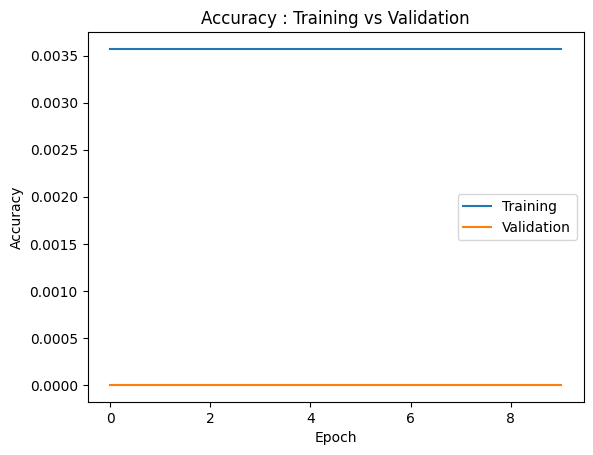

In [ ]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

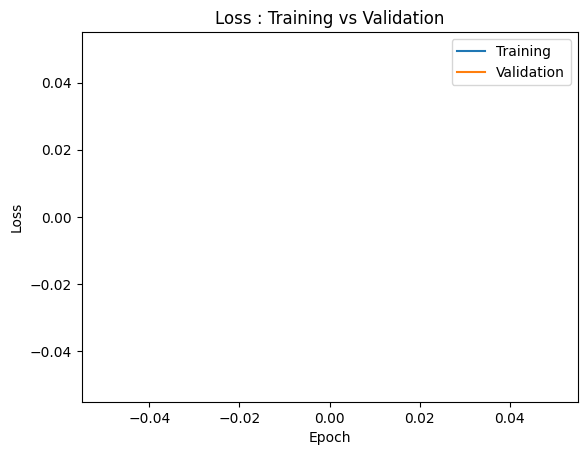

In [ ]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
pred_train = model.predict(s_train_x)
pred_test = model.predict(s_test_x)

logi_train_accuracy = accuracy_score(train_y, pred_train)
logi_test_accuracy = accuracy_score(test_y, pred_test)

print('CNN')
print(f'트레이닝 정확도 : {logi_train_accuracy*100:.2f}%')
print(f'테스트 정확도 : {logi_test_accuracy*100:.2f}%')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:123: RuntimeWarning: invalid value encountered in cast
  return y.dtype.kind == "f" and np.all(y.astype(int) == y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/multiclass.py:380: RuntimeWarning: invalid value encountered in cast
  if xp.any(data != data.astype(int)):


ValueError: Input y_pred contains NaN.

5. **Transfer Learning**으로 모델링

    → ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
clear_session()

resnet50_model = ResNet50(include_top=False,
                          weights='imagenet',
                          input_shape=(32, 32, 3),
                          pooling='avg' # include_top이 False일 때 사용가능. avg면 global average pooling)
)
new_output = Dense(n, activation = 'softmax')(resnet50_model.output)

model = Model(resnet50_model.input, new_output)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,743,436 (90.57 MB)

 Trainable params: 23,690,316 (90.37 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
from keras.utils import plot_model

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
len(model.layers)

177

In [ ]:
for idx, layer in enumerate(model.layers):
    if idx < 150:
        layer.trainable=False
    else:
        layer.trainable=True

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0,
    verbose = 1,
    patience=5,
    restore_best_weights=True
)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                patience=3,
                                 verbose=1,
                                 factor=.5,
                                 min_lr=0.000001)

In [ ]:
model.fit(s_train_x, train_y, epochs=10000, validation_split=.2, verbose=1, callbacks=[es, lr_reduction])

Epoch 1/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.0356 - loss: nan - val_accuracy: 0.0429 - val_loss: nan - learning_rate: 0.0010
Epoch 2/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0204 - loss: nan - val_accuracy: 0.0429 - val_loss: nan - learning_rate: 0.0010
Epoch 3/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0351 - loss: nan
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.0344 - loss: nan - val_accuracy: 0.0429 - val_loss: nan - learning_rate: 0.0010
Epoch 4/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0240 - loss: nan - val_accuracy: 0.0429 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 5/10000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0349 - loss: nan - val_accuracy: 0.0429 - val_loss: nan - learning_rate: 5.0000e-04
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
y_pred = model.predict(s_test_x)

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


In [ ]:
y_pred.shape

(50, 76)

In [ ]:
y_pred[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

In [ ]:
y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.ravel(test_y)

In [ ]:
y_pred_arg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

6. **Yolo - Classification**으로 모델링

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.5/749.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from ultralytics import YOLO, settings

In [ ]:
settings
# datasets_dir: /content/datasets 안에 dataset을 다운받겠다는 의미
# trainset의 경로, validset의 경로 등을 설정 가능
# clearml부터 wandb까지는 모델 학습 뒤 결과물 공유하기 위해 저장할 수 있게끔 해둔 것

{'settings_version': '0.0.4',
 'datasets_dir': '/content/datasets',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

In [ ]:
settings['datasets_dir'] = '/content/'
settings.update()
settings

{'settings_version': '0.0.4',
 'datasets_dir': '/content/',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

In [ ]:
model = YOLO(model='yolov8n-cls.pt') # content 폴더에 모델 담음

- Parameters
    1. data : 학습시킬 데이터셋의 경로. default 'coco128.yaml'
    2. epochs : 학습 데이터 전체를 총 몇 번씩 학습시킬 것인지 설정. default 100
    3. patience : 학습 과정에서 성능 개선이 발생하지 않을 때 몇 epoch 더 지켜볼 것인지 설정. default 50
    4. batch : 미니 배치의 사이즈 설정. default 16. -1일 경우 자동 설정.
    5. imgsz : 입력 이미지의 크기. default 640 (640x640. 비율 맞추기 위해 회색부분 추가)
    6. save : 학습 과정을 저장할 것인지 설정. default True
    7. project : 학습 과정이 저장되는 폴더의 이름.
    8. name : project 내부에 생성되는 폴더의 이름.
    9. exist_ok : 동일한 이름의 폴더가 있을 때 덮어씌울 것인지 설정. default False
    10. pretrained : 사전 학습된 모델을 사용할 것인지 설정. default False
    11. optimizer : 경사 하강법의 세부 방법 설정. default 'auto'
    12. verbose : 학습 과정을 상세하게 출력할 것인지 설정. default False
    13. seed : 재현성을 위한 난수 설정
    14. resume : 마지막 학습부터 다시 학습할 것인지 설정. default False
    15. freeze : 첫 레이어부터 몇 레이어까지 기존 가중치를 유지할 것인지 설정. default None

In [ ]:
model.train(data=dataset_path,
            epochs=10,
            patience=5,
            save=True,
            # project='trained',
            # name='trained_model',
            exist_ok=False,
            pretrained=True,
            optimizer='auto', # optimizer is selected based on the size of your dataset and batch size
            verbose=False,
            seed=2024,
            resume=False, # True -> Load the weights from the last.pt file and continue training from the last completed epoch.
            freeze=None
            )

Ultralytics YOLOv8.1.44 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small, epochs=10, time=None, patience=5, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=2024, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

100%|██████████| 6.23M/6.23M [00:00<00:00, 142MB/s]


AMP: checks passed ✅


FileNotFoundError: Couldn't find any class folder in /content/drive/MyDrive/KT Aivle/7. CNN/Object Detection/Food Classification/food_images_small/train.

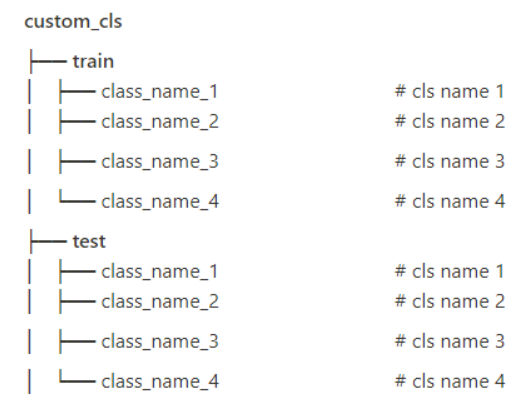

- Parameters
    1. source : 예측 대상 이미지/동영상의 경로
    2. conf : confidence score threshold. default 0.25 → 더 크게 주면 box더 조금 그려짐
    3. iou : NMS에 적용되는 IoU threshold. default 0.7. threshold를 넘기면 같은 object를 가리키는 거라고 판단.
    4. save : 예측된 이미지/동영상을 저장할 것인지 설정. default False
    5. save_txt : Annotation 정보도 함께 저장할 것인지 설정. default False
    6. save_conf : Annotation 정보 맨 끝에 Confidence Score도 추가할 것인지 설정. default False
    7. line_width : 그려지는 박스의 두께 설정. default None

In [ ]:
results = model.predict(source=test_path,
                        conf=,
                        iou=,
                        save=True,
                        save_txt=True,
                        line_width=2)

7. 추론 결과와 정답이 맞는지 비교해보기